In [1]:
#!/usr/bin/env python
"""
Definition of test problems
--------------------------------------------------------------------------
Created December 10, 2022 for TRIPs-Py library
"""
__author__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com"
# import os,sys
# sys.path.insert(0,'/Users/mirjetapasha/Documents/Research_Projects/TRIPSpy/TRIPSpy')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
from trips.operators import *
##Specify the font
##Latex needs to be installed! If not installed, please comment the following 5 lines
# parameters = {'xtick.labelsize': 12, 'ytick.labelsize': 12,
#           'axes.titlesize': 18, 'axes.labelsize': 18, 'figure.titlesize': 14, 'legend.fontsize': 13}
# plt.rcParams.update(parameters)
import time
import numpy as np
import scipy as sp
import scipy.stats as sps
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import astra
# import phantoms as phantom
from venv import create
import pylops
from scipy.ndimage import convolve
from scipy import sparse
from scipy.ndimage import convolve
import scipy.special as spe
from trips.testProblems import *
from trips.operators import *
from trips.solvers.gks import *
from trips.solvers.Tikhonov import *
from trips.solvers.tSVD import *
from trips.solvers.ArnoldiTikhonov import *

In [2]:
# Deblurring example test problem
Deblur = Deblurring()
# In the class Deblurring we have can define the type of problem to be used.
generate_matrix = 'False' #Defines a blurring operator where the forward operator matrix is formed explicitly
imagesize_x = 64 # Define the first dimension of the image
imagesize_y = 64 # Defines the second dimension of the image
spread = 1.5 # The PSF parameter
choose_image = 'satellite64' #The choice of the image
if generate_matrix == True:
        # spread = [2,2]
        size = imagesize_x
        shape = (size, size)
        spreadnew = (spread, spread)
        A = Deblur.forward_Op_matrix(spreadnew, shape, imagesize_x, imagesize_y)
else:
        A = Deblur.forward_Op([11,11], 0.5, imagesize_x, imagesize_y)
x_true = Deblur.generate_true(choose_image)
b_true = Deblur.generate_data(x_true, generate_matrix)
(b, delta) = Deblur.add_noise(b_true, 'Gaussian', noise_level = 0.01)
Deblur.plot_rec(x_true.reshape((shape), order = 'F'), save_imgs = True, save_path='./saveImagesDeblurring'+'rec'+choose_image)

NameError: name 'shape' is not defined

In [12]:
b_vec = b.reshape((-1,1))
xx = arnoldi_tikhonov(A, b_vec, projection_dim=5, regparam = 10, delta = delta)

generating basis...: 100%|██████████| 5/5 [00:00<00:00, 408.66it/s]


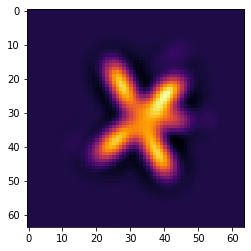

In [14]:
plt.imshow(xx.reshape(imagesize_x, imagesize_y))